# **Libraries Installation**

In [1]:
# pip install pyspellchecker

In [2]:
# !pip install scattertext

In [3]:
# !pip install nltk

# **Import necessary Libraries**

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ustb\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ustb\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ustb\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# **Load and Explain the DataSet**

This appears to be a sample dataset containing social media data, possibly extracted from Twitter. Here's a brief explanation of each column and its potential relevance:

### **Column Descriptions:**
1. **Unnamed: 0**: 
   - Likely an index column from the original dataset. This can be dropped if redundant.

2. **author_id**: 
   - Unique identifier for the user who posted the tweet.

3. **author_name**: 
   - The display name of the user.

4. **author_username**: 
   - The user's Twitter handle or username.

5. **created_at**: 
   - Timestamp indicating when the tweet was posted. Useful for time-based analysis.

6. **id**: 
   - Unique identifier for the tweet itself. Can be used for referencing or further querying the tweet.

7. **public_metrics**: 
   - Dictionary containing engagement metrics such as:
     - **`retweet_count`**: Number of times the tweet has been retweeted.
     - **`reply_count`**: Number of replies to the tweet.
     - **`like_count`**: Number of likes on the tweet.

8. **text**: 
   - The content of the tweet. This is critical for text analysis, sentiment analysis, or keyword extraction.

9. **retweet_count** (separate from `public_metrics`): 
   - Direct count of retweets for quick access.

10. **like_count** (separate from `public_metrics`): 
   - Direct count of likes for quick access.

11. **target**: 
   - A label or class for the tweet, likely indicating the sentiment or relevance (e.g., 1 for positive, 0 for negative).

---

### **Potential Use Cases for Analysis:**
1. **Sentiment Analysis**: Analyze the `text` and `target` to classify sentiments.
2. **Engagement Insights**: Use `retweet_count` and `like_count` to identify highly engaging posts.
3. **Temporal Analysis**: Study trends over time using `created_at`.
4. **User Behavior**: Understand how different `author_id` or `author_username` accounts interact with the topic.
5. **Topic Modeling**: Extract common themes or topics from the `text`.

In [5]:
df= pd.read_csv("D:/datasets/Data_sets/prochoice_prolife.csv")
df.head()

,Unnamed: 0,author_id,author_name,author_username,created_at,id,public_metrics,text,retweet_count,like_count,target
0,28588,73506221,Oregon Right to Life,OR_RTL,2022-06-23 00:00:06+00:00,1539760170900799490,"{'retweet_count': 5, 'reply_count': 0, 'like_c...",We know that unsupported pregnancies can gener...,5,13,1
1,28587,96631851,αιяgσ*мαтι¢*σρтιχ,sacraficial,2022-06-23 00:01:14+00:00,1539760456977395712,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",If you are murdered by a George W. Bush weapon...,0,0,1
2,28586,3041829701,skb,skb37027,2022-06-23 00:04:30+00:00,1539761277702213633,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",.@MarshaBlackburn so much for #ProLife. https:...,0,0,1
3,28537,177260708,Right To Life League,Right2LifeLg,2022-06-23 00:09:50+00:00,1539762620055552001,"{'retweet_count': 6, 'reply_count': 3, 'like_c...",Follow our instagram for more posts like this!...,6,19,1
4,27450,1523376591052582912,No Forced Birth,NoForcedBirth,2022-06-23 00:09:57+00:00,1539762647922421763,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Another classy tweet from the forced birth cro...,0,1,0


# **Outlines or Stpes of Sentiment Analysis:**

### **Sentiment Analysis: Classify Sentiments from Text and Target**
Sentiment analysis is a process of determining the emotional tone expressed in text data, typically as **positive**, **negative**, or **neutral**. Here's how you can approach it for your dataset:


### **Step-by-Step Process**

1. **Keep Relevant Features:**
   - For sentiment analysis, you only need the following columns:
     - **`text`**: Contains the tweet's content to be analyzed.
     - **`target`**: Indicates the sentiment (1 for positive, 0 for negative, or any other labeling system).

   **Drop the rest** since they're not directly needed for text-based sentiment analysis.


2. **Text Preprocessing:**
   - Clean the `text` data for better model performance:
     - **Remove URLs**: Tweets often contain links, which are unnecessary.
     - **Lowercase Conversion**: Standardize the text to lowercase.
     - **Remove Special Characters**: Strip punctuation, emojis, and symbols.
     - **Remove Stop Words**: Exclude common words (like "is", "the") that add little meaning.
     - **Tokenization**: Split text into individual words (tokens).
     - **Stemming/Lemmatization**: Reduce words to their base forms.


3. **Feature Engineering:**
   - Convert the preprocessed text into numerical representations suitable for machine learning:
     - **Bag of Words (BoW)**: Represents word frequency in the text.
     - **TF-IDF (Term Frequency-Inverse Document Frequency)**: Highlights important words by weighting their frequency across documents.
     - **Word Embeddings**: Use techniques like Word2Vec, GloVe, or BERT for capturing semantic meanings.


4. **Model Selection:**
   - Apply a machine learning or deep learning model to classify sentiments:
     - **Machine Learning Models**: Logistic Regression, Naive Bayes, Random Forest.
     - **Deep Learning Models**: LSTM, GRU, BERT for advanced text understanding.
   - Use `target` as the label for supervised learning.


5. **Evaluation:**
   - Evaluate model performance using metrics like:
     - **Accuracy**
     - **Precision**
     - **Recall**
     - **F1-Score**
     - **Confusion Matrix** for a detailed performance breakdown.

In [6]:
# Keep only 'text' and 'target' columns
data = df[['text', 'target']]

# Display the first few rows of the filtered DataFrame
data.head()

,text,target
0,We know that unsupported pregnancies can gener...,1
1,If you are murdered by a George W. Bush weapon...,1
2,.@MarshaBlackburn so much for #ProLife. https:...,1
3,Follow our instagram for more posts like this!...,1
4,Another classy tweet from the forced birth cro...,0


# **Text Preprocessing**

Task: Clean the text column by removing unnecessary elements and standardizing it.

1- Convert to lowercase.

2- Remove URLs, special characters, and numbers.

3- Tokenize text into words.

4- Remove stopwords (e.g., "the", "is").

5- Lemmatize words to their root forms.

In [7]:
def preprocess_text(text):
    
    # Convert text to lowercase
    text = text.lower()
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    # Remove special characters and numbers
    text = re.sub(r'\W|[^a-zA-Z\s]', ' ', text)


    # Tokenize text
    words = word_tokenize(text)

    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    
    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    
    # Join words back into a single string
    return ' '.join(words)

# Apply preprocessing to the 'text' column
data['cleaned_text'] = data['text'].apply(preprocess_text)
print(data.head())  # Check the cleaned text

                                                text  target  \
0  We know that unsupported pregnancies can gener...       1   
1  If you are murdered by a George W. Bush weapon...       1   
2  .@MarshaBlackburn so much for #ProLife. https:...       1   
3  Follow our instagram for more posts like this!...       1   
4  Another classy tweet from the forced birth cro...       0   

                                        cleaned_text  
0  know unsupported pregnancy generate lot fear a...  
1  murdered george w bush weapon war died free bo...  
2                       marshablackburn much prolife  
3                 follow instagram post like prolife  
4  another classy tweet forced birth crowd idea g...  


C:\Users\ustb\AppData\Local\Temp\ipykernel_16968\3599931251.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cleaned_text'] = data['text'].apply(preprocess_text)


# **Calculate Text Length Distribution**

C:\Users\ustb\AppData\Local\Temp\ipykernel_16968\2289126366.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text_length'] = data['cleaned_text'].apply(lambda x: len(x.split()))
C:\Users\ustb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


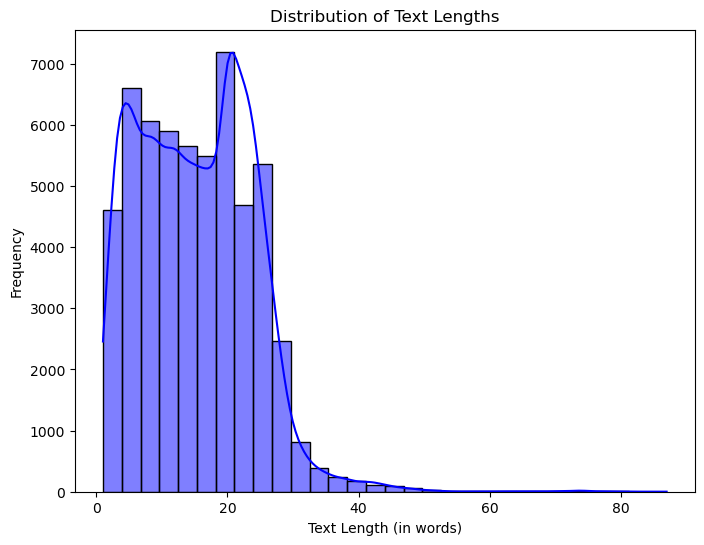

In [8]:
# Calculate text lengths after preprocessing
import seaborn as sns
import numpy as np
data['text_length'] = data['cleaned_text'].apply(lambda x: len(x.split()))

# Plot the distribution of text lengths
plt.figure(figsize=(8, 6))
sns.histplot(data['text_length'], kde=True, color='blue', bins=30)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length (in words)')
plt.ylabel('Frequency')
plt.show()

# **Split Data**

**Split the data into training and testing sets.**

In [9]:
X = data['cleaned_text']  # Features
y = data['target']        # Target labels

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))


Training samples: 44832
Testing samples: 11208


In [17]:
def clean_text(text):
    import re
    temp = text.lower()
    temp = re.sub("@[A-Za-z0-9_]+","", temp)
    temp = re.sub("#","", temp)
    temp = re.sub(r"http\S+", "", temp)
    temp = re.sub(r"www.\S+", "", temp)
    temp = re.sub('[()!?]', ' ', temp)
    temp = re.sub('[.*?]',' ', temp)
    temp = re.sub("\n"," ", temp)
    temp = re.sub("[^a-z0-9òàùèéì]"," ", temp)
    temp = re.sub(' +',' ', temp)
    return(temp)

def clean_tensor(tensor):
    temp = tf.strings.lower(tensor)
    temp = tf.strings.regex_replace(temp,"@[A-Za-z0-9_]+","")
    temp = tf.strings.regex_replace(temp, "#","")
    temp = tf.strings.regex_replace(temp, r"http\S+", "")
    temp = tf.strings.regex_replace(temp, r"www.\S+", "")
    temp = tf.strings.regex_replace(temp, '[()!?]', ' ')
    temp = tf.strings.regex_replace(temp, '[.*?]',' ')
    temp = tf.strings.regex_replace(temp, "\n"," ")
    temp = tf.strings.regex_replace(temp, "[^a-z0-9òàùèéì]"," ")
    temp = tf.strings.regex_replace(temp, "prochoice"," ")
    temp = tf.strings.regex_replace(temp, "prolife"," ")
    temp = tf.strings.regex_replace(temp, "pro-choice"," ")
    temp = tf.strings.regex_replace(temp, "pro-life"," ")
    temp = tf.strings.regex_replace(temp, ' +',' ')
    return(temp)

doc_clean = X.apply(clean_text)

Lunghezza max: 87


C:\Users\ustb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


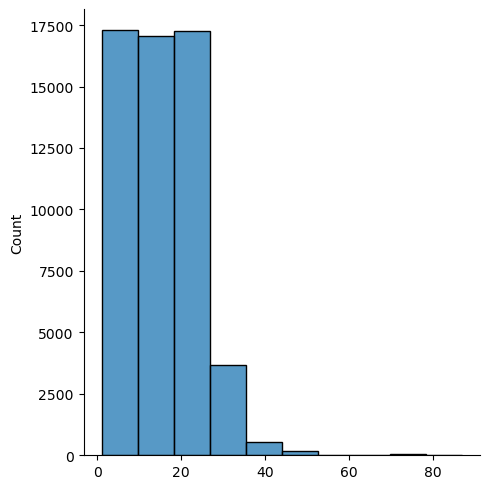

In [18]:
text_lens = [len(s.split()) for s in doc_clean]
sns.displot(data=text_lens, bins=10)
print('Lunghezza max:', max(text_lens))

# **Convert Text to Numerical Features**

**Use TF-IDF to convert cleaned text into numerical vectors for model input.**

In [10]:
# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)

# Transform the training and testing text
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print("TF-IDF feature shape (train):", X_train_tfidf.shape)

TF-IDF feature shape (train): (44832, 5000)


# **Train the Model**

**Use a Naive Bayes classifier to train on the transformed text data.**

In [11]:
# Initialize and train the Naive Bayes model
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

MultinomialNB()

## **Make Predictions**

**Use the trained model to predict sentiments on the test set.**

In [12]:
# Predict the target labels for the test set
y_pred = model.predict(X_test_tfidf)

# **Evaluate the Model**

**Calculate evaluation metrics (accuracy, classification report, and confusion matrix).**

In [13]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Display confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8127230549607424

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.82      0.81      5505
           1       0.83      0.80      0.81      5703

    accuracy                           0.81     11208
   macro avg       0.81      0.81      0.81     11208
weighted avg       0.81      0.81      0.81     11208


Confusion Matrix:
[[4537  968]
 [1131 4572]]


## **Code to Plot Accuracy, Classification Report, and Confusion Matrix**

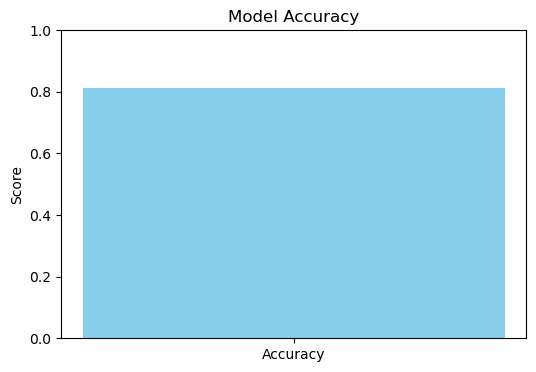

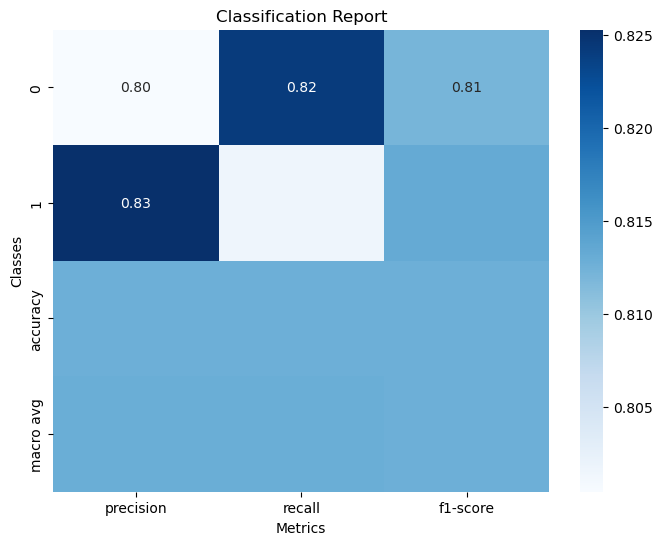

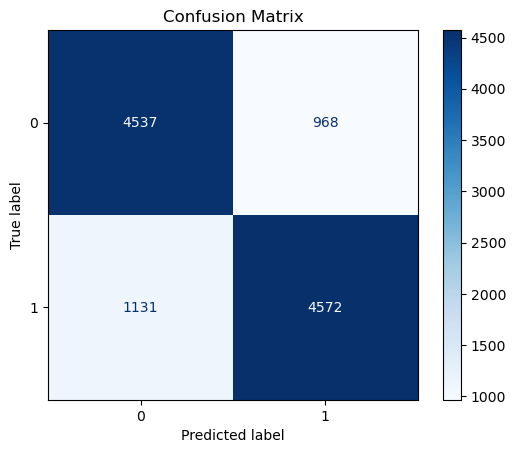

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

# Accuracy Plot
def plot_accuracy(accuracy):
    plt.figure(figsize=(6, 4))
    plt.bar(['Accuracy'], [accuracy], color='skyblue')
    plt.ylim(0, 1)
    plt.ylabel('Score')
    plt.title('Model Accuracy')
    plt.show()

# Classification Report Plot
def plot_classification_report(report):
    report_dict = classification_report(y_test, y_pred, output_dict=True)
    df_report = pd.DataFrame(report_dict).transpose()

    plt.figure(figsize=(8, 6))
    sns.heatmap(df_report.iloc[:-1, :-1], annot=True, cmap='Blues', fmt='.2f')
    plt.title('Classification Report')
    plt.xlabel('Metrics')
    plt.ylabel('Classes')
    plt.show()

# Confusion Matrix Plot
def plot_confusion_matrix(y_test, y_pred):
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
    plt.title('Confusion Matrix')
    plt.show()

# Call the plots
plot_accuracy(accuracy)
plot_classification_report(classification_report(y_test, y_pred, output_dict=True))
plot_confusion_matrix(y_test, y_pred)